In [47]:
import numpy as np
!pip install hazm
import pandas as pd
from __future__ import unicode_literals
from hazm import *
import re
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [48]:
import re
import pandas as pd
from hazm import *
normalizer = Normalizer()

In [49]:
def uplpad_word_var():
  df = pd.read_csv('word_vav.txt', sep='|', header='infer',encoding="utf-8");
  verses = df['Word'].values.tolist()    
  return verses

In [50]:
def postprocess_hazm(text):
  verses=uplpad_word_var()
  findv=re.findall(r'\bو\w+', text)
  for  va in findv:  
    if va not in verses:
      tex = va
      replacement = "و "
      result = tex.replace(tex[0:1], replacement, 1)
      text=text.replace(va, result)
  return text


In [51]:
def acronyms(txt):
  normalizer = Normalizer()
  txt=normalizer.normalize(txt)
  txt = re.sub(r"[A-Za-z«»,:;</()\[\d+>]", "", txt)
  #print(txt)
  matches = re.findall("([\s]([آابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهیئ۱۲۳۴۵۶۷۸۹۰| ]{1,6}\.){2,4})", txt)
  for macth in matches:
  #  print(macth[0])
    y= macth[0]
    z= y.replace('. ', '\u200c')
    z= z.replace('.', '')
  #  print(z)
    txt = txt.replace(y, z)
  #  print(txt)

  return txt

In [52]:
linesnew = []
output = open('voa_fa.txt', "w", encoding = "utf-8", errors='ignore') 
with open("/content/drive/MyDrive/voa_fa_2003-2008_orig.txt", "r", encoding = "utf-8", errors='ignore') as f:
    line = f.readline()
    while line:
     
        line = f.readline()
        line=acronyms(line)
        linesnew.append(line)
        output.write(line)

corpus=linesnew
output.close()

In [53]:
stopword=[]

df = pd.read_csv('/content/drive/MyDrive/stopword.txt', engine='python', encoding='utf-8',error_bad_lines=False) 
stopword = df['WORD'].values.tolist()  
print(stopword)

['!', '#', '(', ')', '*', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟', 'آباد', 'آخ', 'آخر', 'آخرها', 'آخه', 'آدمهاست', 'آرام', 'آرام آرام', 'آره', 'آری', 'آزادانه', 'آسان', 'آسیب پذیرند', 'آشنایند', 'آشکارا', 'آقا', 'آقای', 'آقایان', 'آمد', 'آمدن', 'آمده', 'آمرانه', 'آن', 'آن گاه', 'آنان', 'آنانی', 'آنجا', 'آنرا', 'آنطور', 'آنقدر', 'آنها', 'آنهاست', 'آنچنان', 'آنچنان که', 'اونجور', 'اونجوری', 'اونجوری که', 'آنچه', 'آنکه', 'آنگاه', 'آن\u200cها', 'آهان', 'آهای', 'آور', 'آورد', 'آوردن', 'آورده', 'آوه', 'آی', 'آیا', 'آید', 'آیند', 'ا', 'اتفاقا', 'اثرِ', 'اجراست', 'احتراما', 'احتمالا', 'احیاناً', 'اخیر', 'اخیراً', 'اری', 'از', 'از آن پس', 'از بس که', 'از جمله', 'ازاین رو', 'ازجمله', 'ازش', 'اساسا', 'اساساً', 'است', 'استفاد', 'استفاده', 'اسلامی اند', 'اش', 'اشتباها', 'اشکارا', 'اصلا', 'اصلاً', 'اصولا', 'اصولاً', 'اعلام', 'اغلب', 'افزود', 'افسوس', 'اقل', 'اقلیت', 'الا', 'الان', 'البته', 'البتّه', 'الهی', 'الی', 'ام', 'اما', 'امروز', 'امروزه', 'امسال', 'امشب', 'امور', 'امیدوارم', 'ام

Skipping line 7: Expected 1 fields in line 7, saw 2


In [54]:
from __future__ import unicode_literals
from hazm import *
normalizer = Normalizer()

In [55]:
def tokenize_corpus(corpus):
    tokens = [word_tokenize(postprocess_hazm(normalizer.normalize (x))) for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)

In [195]:
print(tokenized_corpus[0:20])

[['بنا', 'به', 'گزارشهای', 'منتشره', 'در', 'توکیو', '،', 'ژاپن', 'و', 'روسیه', 'در', 'زمینه', 'یک', 'پیمان', 'صلح', 'در', 'چارچوبی', 'گسترده', 'توافق', 'کرده\u200cاند', 'که', 'رسما', 'به', 'مخاصمات', 'جنگ', 'دوم', 'جهانی', 'میان', 'دو', 'کشور', 'پایان', 'خواهند_داد', '.'], ['در', 'یکی', 'از', 'این', 'گزارشها', '،', 'که', 'از', 'سوی', 'خبرگزاری', 'کیودو', '،', 'انتشار', 'یافته', '،', 'گفته_شده_است', 'که', 'دو', 'کشور', 'برای', 'رفع', 'اختلافات', 'دیرین', 'خود', 'بر', 'سر', 'چهار', 'جزیره', 'از', 'جزایر', 'زنجیره\u200cای', 'کوریل', '،', 'بر', 'اساس', 'سه', 'پیمان', 'گذشته', 'خود', 'عمل', 'خواهند_کرد', '.', 'بموجب', 'یکی', 'از', 'این', 'پیمانها', 'که', 'در', 'سال', '۱۹۵۶', 'امضاء', 'شده', '،', 'دو', 'تا', 'از', 'این', 'جزیره\u200cها', 'پس', 'از', 'امضاء', 'یک', 'پیمان', 'صلح', 'به', 'ژاپن', 'پس', 'داده_خواهد_شد', '.', 'اما', 'بموجب', 'پیمانی', 'که', 'در', 'سال', '۱۹۹۳', 'به', 'امضاء', 'رسیده', '،', 'مسئله', 'حاکمیت', 'این', 'چهار', 'جزیره', 'بایستی', 'پیش', 'از', 'امضاء', 'پیمان', 'صلح', 

In [17]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [197]:
  print(idx2word)
  print(word2idx)

{0: 'بنا', 1: 'به', 2: 'گزارشهای', 3: 'منتشره', 4: 'در', 5: 'توکیو', 6: '،', 7: 'ژاپن', 8: 'و', 9: 'روسیه', 10: 'زمینه', 11: 'یک', 12: 'پیمان', 13: 'صلح', 14: 'چارچوبی', 15: 'گسترده', 16: 'توافق', 17: 'کرده\u200cاند', 18: 'که', 19: 'رسما', 20: 'مخاصمات', 21: 'جنگ', 22: 'دوم', 23: 'جهانی', 24: 'میان', 25: 'دو', 26: 'کشور', 27: 'پایان', 28: 'خواهند_داد', 29: '.', 30: 'یکی', 31: 'از', 32: 'این', 33: 'گزارشها', 34: 'سوی', 35: 'خبرگزاری', 36: 'کیودو', 37: 'انتشار', 38: 'یافته', 39: 'گفته_شده_است', 40: 'برای', 41: 'رفع', 42: 'اختلافات', 43: 'دیرین', 44: 'خود', 45: 'بر', 46: 'سر', 47: 'چهار', 48: 'جزیره', 49: 'جزایر', 50: 'زنجیره\u200cای', 51: 'کوریل', 52: 'اساس', 53: 'سه', 54: 'گذشته', 55: 'عمل', 56: 'خواهند_کرد', 57: 'بموجب', 58: 'پیمانها', 59: 'سال', 60: '۱۹۵۶', 61: 'امضاء', 62: 'شده', 63: 'تا', 64: 'جزیره\u200cها', 65: 'پس', 66: 'داده_خواهد_شد', 67: 'اما', 68: 'پیمانی', 69: '۱۹۹۳', 70: 'رسیده', 71: 'مسئله', 72: 'حاکمیت', 73: 'بایستی', 74: 'پیش', 75: 'فیصله', 76: 'یابد', 77: 'هیچ', 78: 'طر

In [18]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [19]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [21]:

embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 100
learning_rate = 0.001

for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')

Loss at epo 0: 7.548660287132589
Loss at epo 1: 7.4581890592426285
Loss at epo 2: 7.375090844829582
Loss at epo 3: 7.298354273033709
Loss at epo 4: 7.227146662982045
Loss at epo 5: 7.160780450962982
Loss at epo 6: 7.098682724968993
Loss at epo 7: 7.040375588331676
Loss at epo 8: 6.985454607063027
Loss at epo 9: 6.933577974430697
Loss at epo 10: 6.884451679099368
Loss at epo 11: 6.837823665248338
Loss at epo 12: 6.793474803353489
Loss at epo 13: 6.7512142629006995
Loss at epo 14: 6.710873301989256
Loss at epo 15: 6.672304105439831
Loss at epo 16: 6.635375102420087
Loss at epo 17: 6.599968338172113
Loss at epo 18: 6.565978736526722
Loss at epo 19: 6.533311965472631
Loss at epo 20: 6.50188177009217
Loss at epo 21: 6.471610298394094
Loss at epo 22: 6.442426650609162
Loss at epo 23: 6.414266662647253
Loss at epo 24: 6.3870706877949335
Loss at epo 25: 6.360784123503612
Loss at epo 26: 6.335356845366831
Loss at epo 27: 6.3107421295426755
Loss at epo 28: 6.286897409901045
Loss at epo 29: 6.263

In [22]:
!pip install scikit-plot

In [23]:
%matplotlib inline
from scikitplot.decomposition import plot_pca_2d_projection
from sklearn.decomposition import PCA

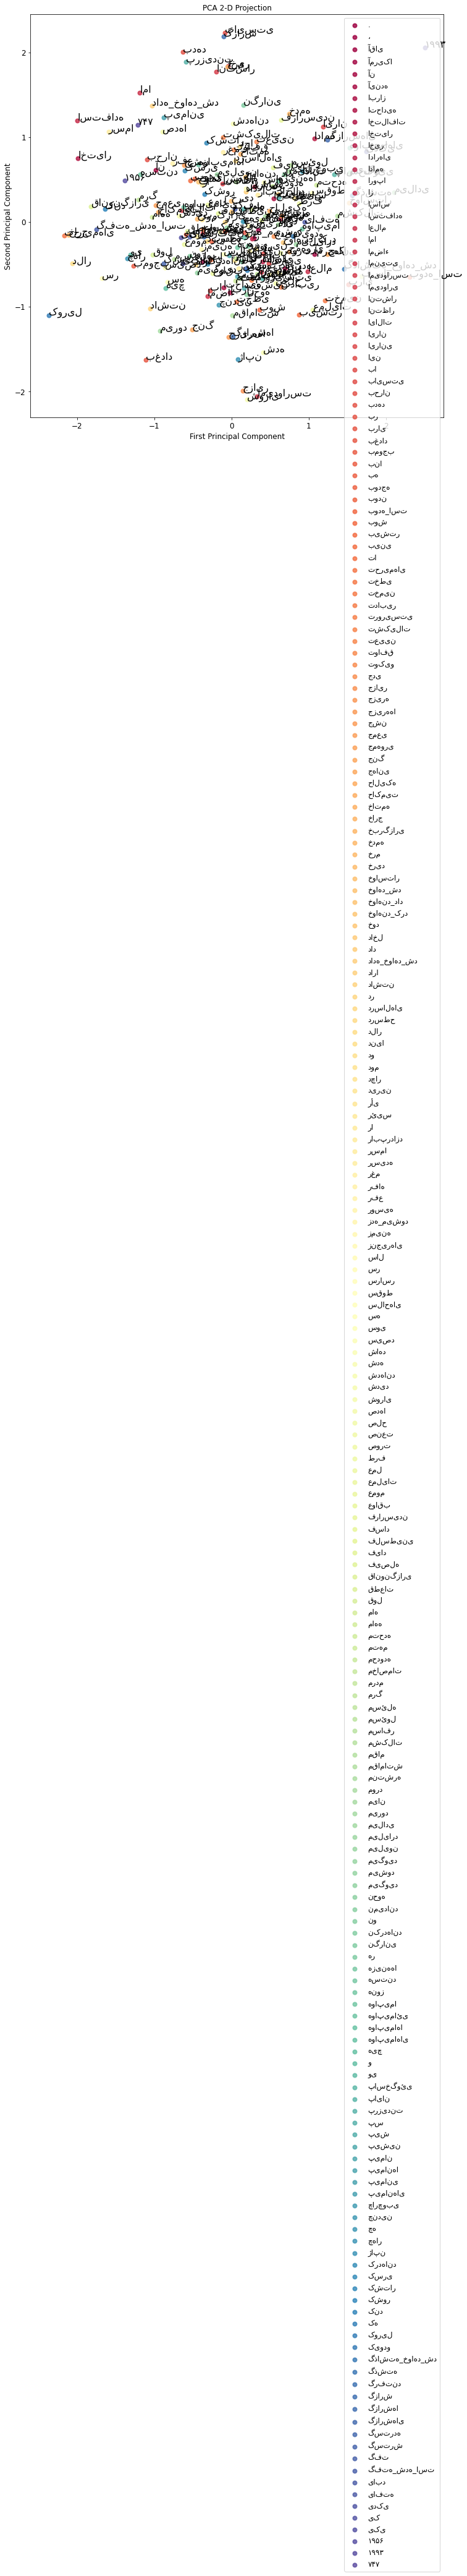

In [37]:
pca = PCA(n_components=2)
pca.fit(W1.data.numpy().T)
proj = pca.transform(W1.data.numpy().T)
ax = plot_pca_2d_projection(pca, W1.data.numpy().T, np.array(vocabulary), feature_labels=vocabulary, figsize=(12,12), text_fontsize=12)
# ax.legend(None)
for i, txt in enumerate(vocabulary):
    ax.annotate(txt, (proj[i,0], proj[i,1]), size=16)

In [38]:
def get_word_vector_v(word):
    return W1[:, word2idx[word]].data.numpy()

def get_word_vector_u(word):
    return W2[word2idx[word],:].data.numpy()

In [40]:
pol = 1 * get_word_vector_v('جنگ') + 1 * get_word_vector_u('جنگ')
ger = 1 * get_word_vector_v('هواپیما') + 1 * get_word_vector_u('هواپیما') 
waw = 1 * get_word_vector_v('خدمه') + 1 * get_word_vector_u('خدمه') 

yyy = waw - pol + ger

In [42]:
from scipy.spatial.distance import cosine
distances = [(v, cosine(yyy, 1 * get_word_vector_u(v) + 1 * get_word_vector_v(v))) for v in vocabulary]


In [43]:
distances

[('بنا', 1.250683307647705),
 ('به', 0.7864204198122025),
 ('گزارشهای', 0.677373081445694),
 ('منتشره', 0.31626319885253906),
 ('در', 1.0969346463680267),
 ('توکیو', 1.7635554671287537),
 ('،', 1.4688503742218018),
 ('ژاپن', 0.5091765820980072),
 ('و', 0.7487634122371674),
 ('روسیه', 1.5922171473503113),
 ('زمینه', 1.4565779566764832),
 ('یک', 0.9960607592947781),
 ('پیمان', 1.226621851325035),
 ('صلح', 1.2679575383663177),
 ('چارچوبی', 0.9249146357178688),
 ('گسترده', 1.2042856365442276),
 ('توافق', 0.018486738204956055),
 ('کرده\u200cاند', 1.186965525150299),
 ('که', 1.4382003545761108),
 ('رسما', 1.0991724357008934),
 ('مخاصمات', 1.4960265457630157),
 ('جنگ', 1.7914378643035889),
 ('دوم', 0.7767332643270493),
 ('جهانی', 0.4178764820098877),
 ('میان', 0.38044148683547974),
 ('دو', 1.0351465307176113),
 ('کشور', 1.3775939047336578),
 ('پایان', 0.7227133512496948),
 ('خواهند_داد', 0.8642481565475464),
 ('.', 1.2590274810791016),
 ('یکی', 0.4524424076080322),
 ('از', 1.4317830502986908)

In [46]:
context_to_predict = get_word_vector_v('ژاپن')
hidden = Variable(torch.from_numpy(context_to_predict)).float()
a = torch.matmul(W2, hidden)
probs = F.softmax(a, dim=0).data.numpy()
for context, prob in zip(vocabulary, probs):
    print(f'{context}: {prob:.2f}')

بنا: 0.00
به: 0.02
گزارشهای: 0.00
منتشره: 0.00
در: 0.00
توکیو: 0.00
،: 0.00
ژاپن: 0.00
و: 0.00
روسیه: 0.01
زمینه: 0.00
یک: 0.04
پیمان: 0.01
صلح: 0.03
چارچوبی: 0.00
گسترده: 0.00
توافق: 0.00
کرده‌اند: 0.01
که: 0.00
رسما: 0.00
مخاصمات: 0.04
جنگ: 0.00
دوم: 0.00
جهانی: 0.00
میان: 0.00
دو: 0.00
کشور: 0.01
پایان: 0.00
خواهند_داد: 0.00
.: 0.00
یکی: 0.00
از: 0.01
این: 0.00
گزارشها: 0.00
سوی: 0.04
خبرگزاری: 0.00
کیودو: 0.00
انتشار: 0.01
یافته: 0.00
گفته_شده_است: 0.00
برای: 0.00
رفع: 0.00
اختلافات: 0.00
دیرین: 0.00
خود: 0.00
بر: 0.00
سر: 0.00
چهار: 0.00
جزیره: 0.00
جزایر: 0.00
زنجیره‌ای: 0.00
کوریل: 0.01
اساس: 0.00
سه: 0.00
گذشته: 0.00
عمل: 0.01
خواهند_کرد: 0.00
بموجب: 0.00
پیمانها: 0.02
سال: 0.01
۱۹۵۶: 0.00
امضاء: 0.00
شده: 0.00
تا: 0.00
جزیره‌ها: 0.00
پس: 0.01
داده_خواهد_شد: 0.02
اما: 0.00
پیمانی: 0.00
۱۹۹۳: 0.04
رسیده: 0.00
مسئله: 0.00
حاکمیت: 0.00
بایستی: 0.00
پیش: 0.00
فیصله: 0.00
یابد: 0.00
هیچ: 0.05
طرف: 0.00
نحوه: 0.00
استفاده: 0.00
پیمان‌های: 0.00
پیشین: 0.00
را: 0.00
اعلام: 0.00
نکرده‌ا

In [207]:


def similarity(v,u):
  return torch.dot(v,u)/(torch.norm(v)*torch.norm(u))

similarity(W2[word2idx["هواپیما"]], W2[word2idx["جنگ"]]) # = 0.5035



tensor(0.4910, grad_fn=<DivBackward0>)